- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005;...;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12–X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005;...;X17 = amount of bill statement in April, 2005.
- X18–X23: Amount of previous payment (NT dollar).
- X18 = amount paid in September, 2005; X19 = amount paid in August, 2005;...;X23 = amount paid in April, 2005.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the XLS file
# xls_file = "default_credit_score.xls"
# df = pd.read_excel(xls_file)

# # Set the second row as header
# df.columns = df.iloc[0]  # Assign the second row as header
# df = df[1:].reset_index(drop=True)  # Remove the first row and reset index

# # Save as CSV
# csv_file = "default_credit_score.csv"
# df.to_csv(csv_file, index=False)

# print(f"File saved as {csv_file} with corrected headers.")

In [3]:
df = pd.read_csv('default_credit_score.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df_knn = 

### PREPROCESSING

In [15]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,39316.23860,36679.519933,35330.59610,3996.888267,3937.077867,3486.081700,3148.245600,3148.263867,3201.620900,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,49583.69353,47087.923905,46234.74616,4773.919957,4884.847644,4555.878111,4201.959305,4193.019186,4451.731976,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.00000,-81334.000000,-339603.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.75000,1763.000000,1256.00000,1000.000000,833.000000,390.000000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.00000,18104.500000,17071.00000,2100.000000,2009.000000,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.00000,50190.500000,49198.25000,5006.000000,5000.000000,4505.000000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,174333.35000,165794.300000,161912.00000,18428.200000,19004.350000,17589.400000,16014.950000,16000.000000,17343.800000,1.000000


In [4]:
# dropping ID since it will mess the training, due to the numerical values
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 24)

In [6]:
df.columns.values[-1] = 'DEFAULT_PAYMENT'

**records are from september to abril, backwards.**

+ PAY_N = payment status,  -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
+ BILL_AMTN = amount of bill statement
+ PAY_AMTN = amount of previous payment

In [7]:
df.isnull().sum()

LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
DEFAULT_PAYMENT    0
dtype: int64

### OUTLIERS

In [8]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT_PAYMENT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
print(df.columns)  # Check available columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAYMENT'],
      dtype='object')


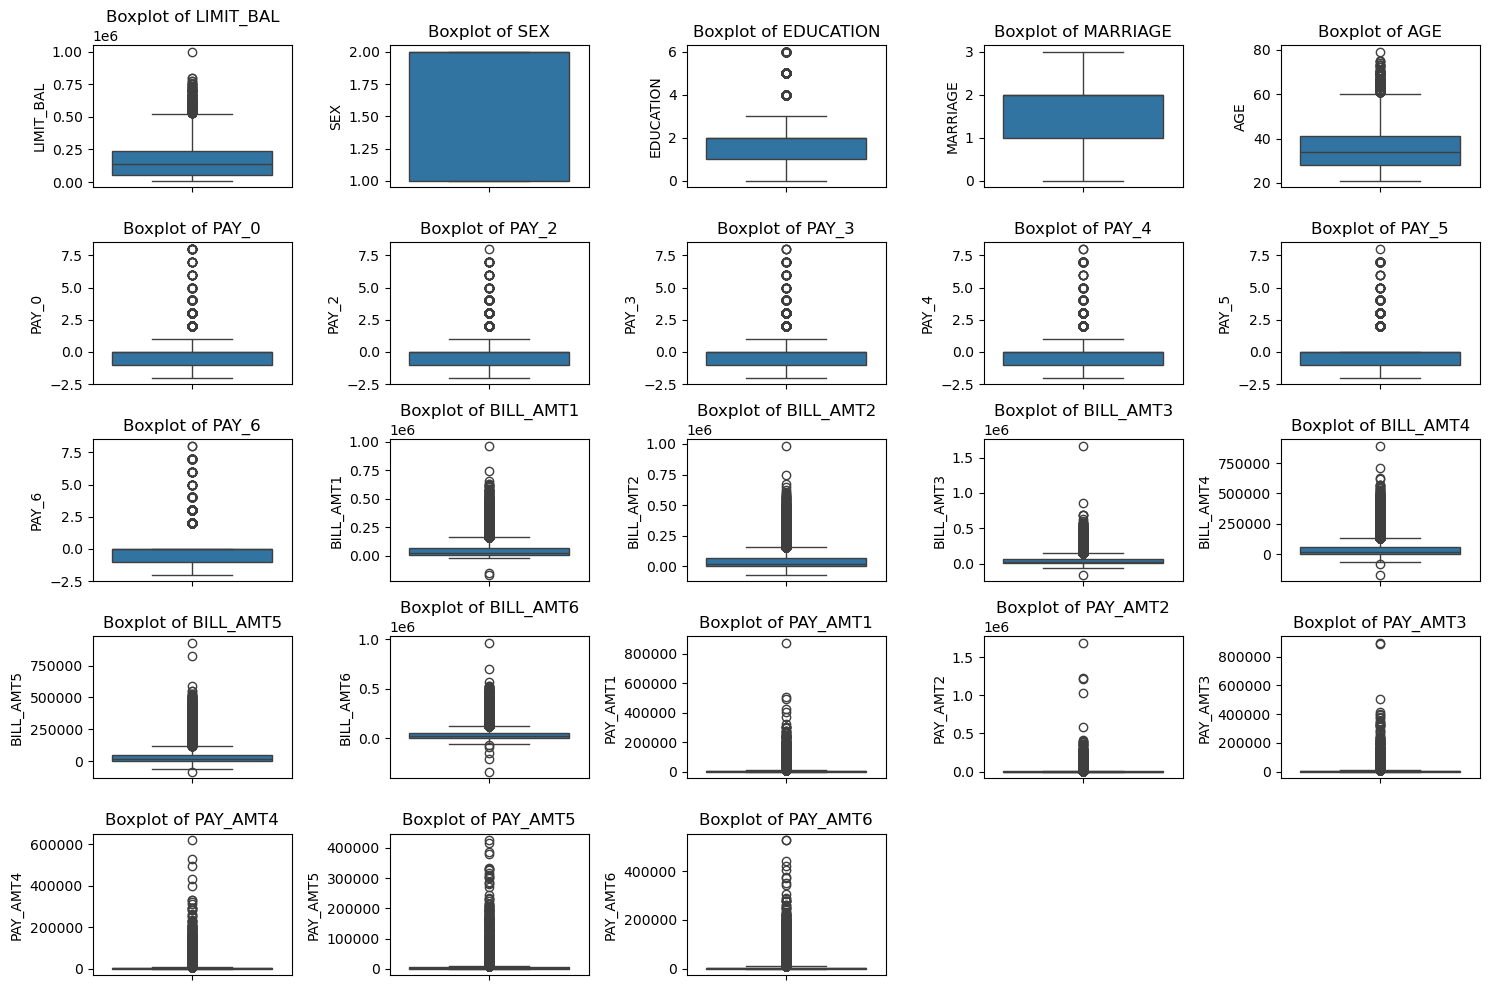

In [10]:
# Select only numerical columns
numerical_cols = df.drop(columns=["DEFAULT_PAYMENT"]).columns

# Set plot size
plt.figure(figsize=(15, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

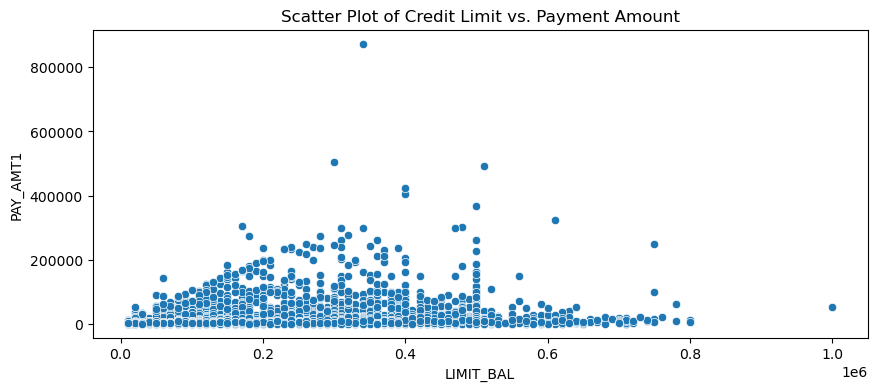

In [11]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x=df["LIMIT_BAL"], y=df["PAY_AMT1"])
plt.xlabel("LIMIT_BAL")
plt.ylabel("PAY_AMT1")
plt.title("Scatter Plot of Credit Limit vs. Payment Amount")
plt.show()

In [12]:
# Define the cap limit (95th percentile)
def cap_outliers(df, cols, threshold=0.95):
    for col in cols:
        upper_limit = np.percentile(df[col], threshold * 100)
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    return df

# Apply capping to the most affected features
cols_to_cap = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6",
               "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]
df = cap_outliers(df, cols_to_cap)

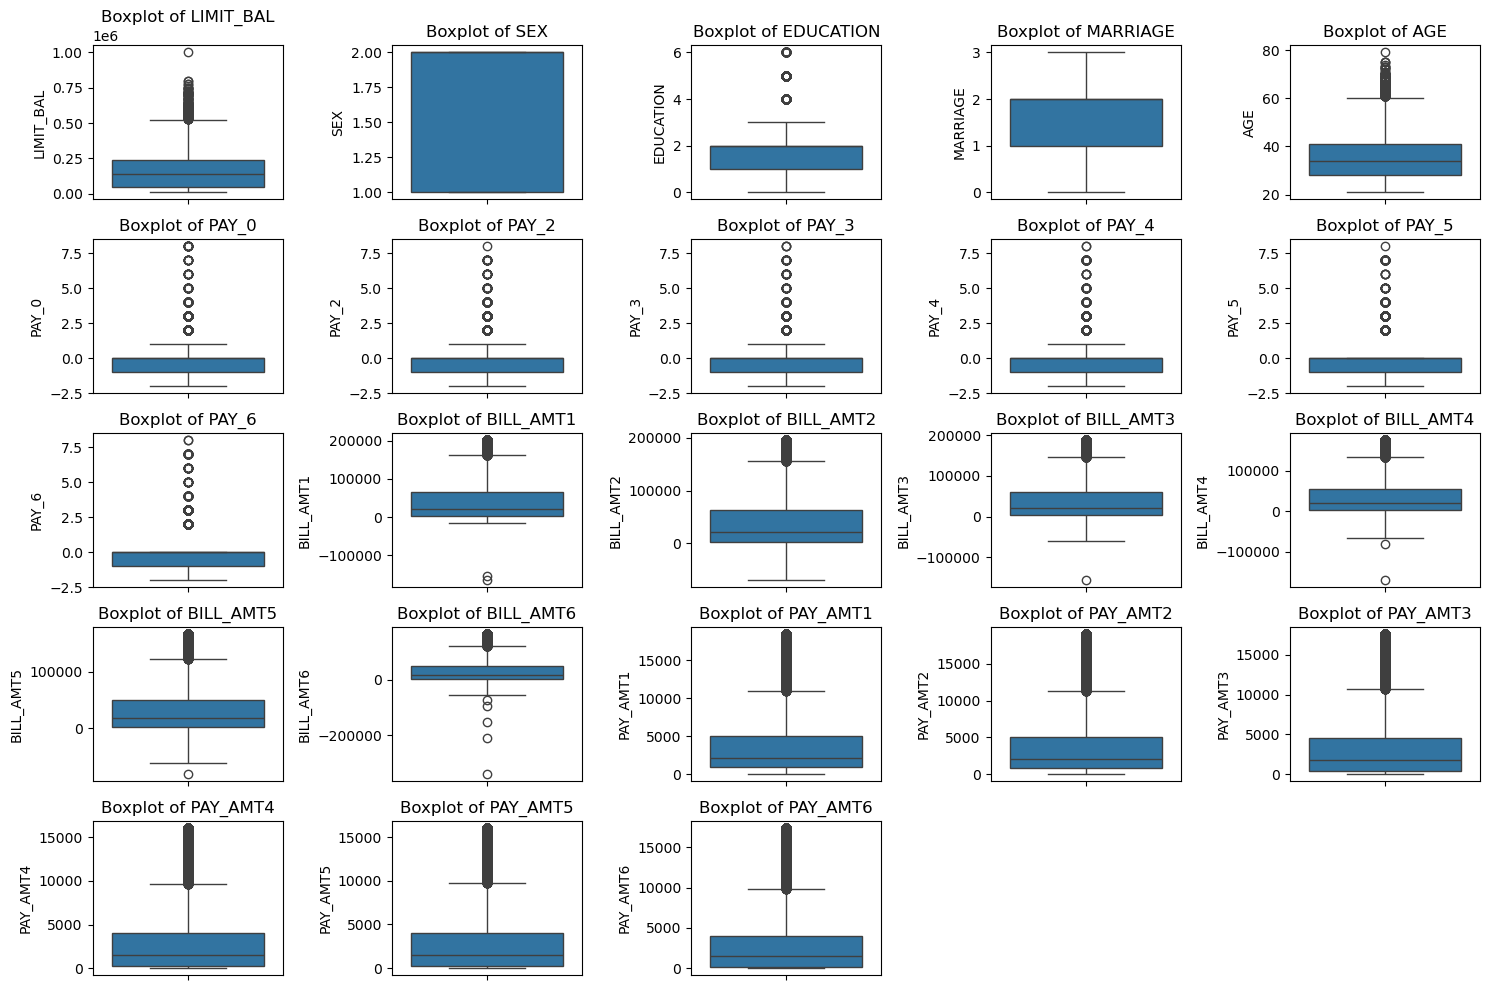

In [17]:
# select only numerical columns
numerical_cols = df.columns[df.columns != "DEFAULT_PAYMENT"]

plt.figure(figsize=(15, 10))

# Loop through numerical columns and create boxplots
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

### SCALING

In [16]:
from sklearn.preprocessing import StandardScaler

# define features (X) and target (y)
X_knn = df.drop(columns=['DEFAULT_PAYMENT'])
y_knn = df['DEFAULT_PAYMENT']

# standarization 
scaler = StandardScaler()
X_scaled_knn = scaler.fit_transform(X_knn)

# valdiating results
X_scaled_knn.describe()

KeyError: "['DEFAULT_PAYMENT'] not found in axis"